Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Mohamed Abdelaziz | 12137202 | 07.02.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 7 &ndash; Tricks of the Trade</h2>

<b>Authors:</b> Schlüter, Rumetshofer, Schörgenhumer<br>
<b>Date:</b> 24-01-2022

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

In [2]:
# Required packages and the u7_utils file
import u7_utils as u7
from pathlib import Path
import torch

# Exercise 1

- Open the lecture notebook (`U7.ipynb`) and go through "Step 1: Creating the dataset". If you are short of ideas on image classes, food items or comic book characters usually work well. If you run into problems creating the required .csv files that you cannot fix within 5 minutes, use the provided `burgers_and_burritos`, `bridge_and_tower` or `dog_and_wolf` dataset, and only go through the "Download images" steps. Once done, switch back to this notebook.

- Load the dataset that you created, reserving 20% for validation, and enabling data augmentation.

- Plot 9 example images in 3 rows.

**1.1. Specify the path and download the images. Create a dataset with 20% for validation.**

In [58]:
dataset_name = "bedroom_and_livingroom_and_kitchen"
dataset_path = Path(f"resources/{dataset_name}")
# dataset_path.mkdir(parents=True, exist_ok=True)
# u7.download_all_images(dataset_path)

In [59]:
dataset = u7.load_image_dataset(
    dataset_path, valid_size=0.2,
    batch_size=32, augment=True)

**1.2. Plot example images.**

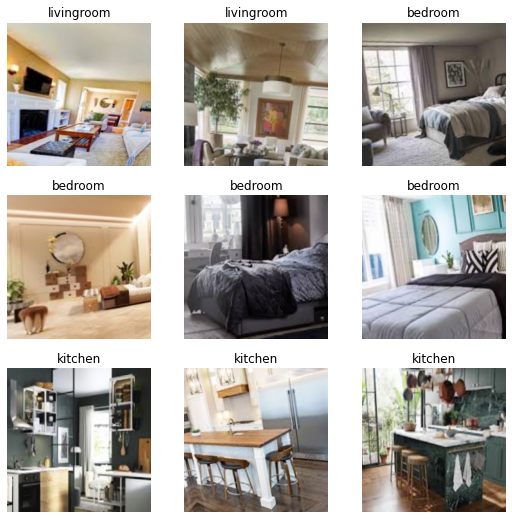

In [60]:
dataset.show_batch(max_n=9, nrows=3, unique=False)

# Exercise 2

- Using `u7.create_cnn()`, create a *pretrained* CNN with 18 layers and the number of classes set according to your dataset (the other settings do not matter). Store the model in a variable called `model`.

- Plot the weights of the first layer (*this is already done for you*).

**2.1. Create the specified CNN.**

In [61]:
model = u7.create_cnn(
    num_classes=dataset.c, num_layers=18,
    batchnorm=True, dropout=0.5,
    residuals=True, pretrained=True)

**Plot the weights of the first layer (already done, only need to execute the cell).**

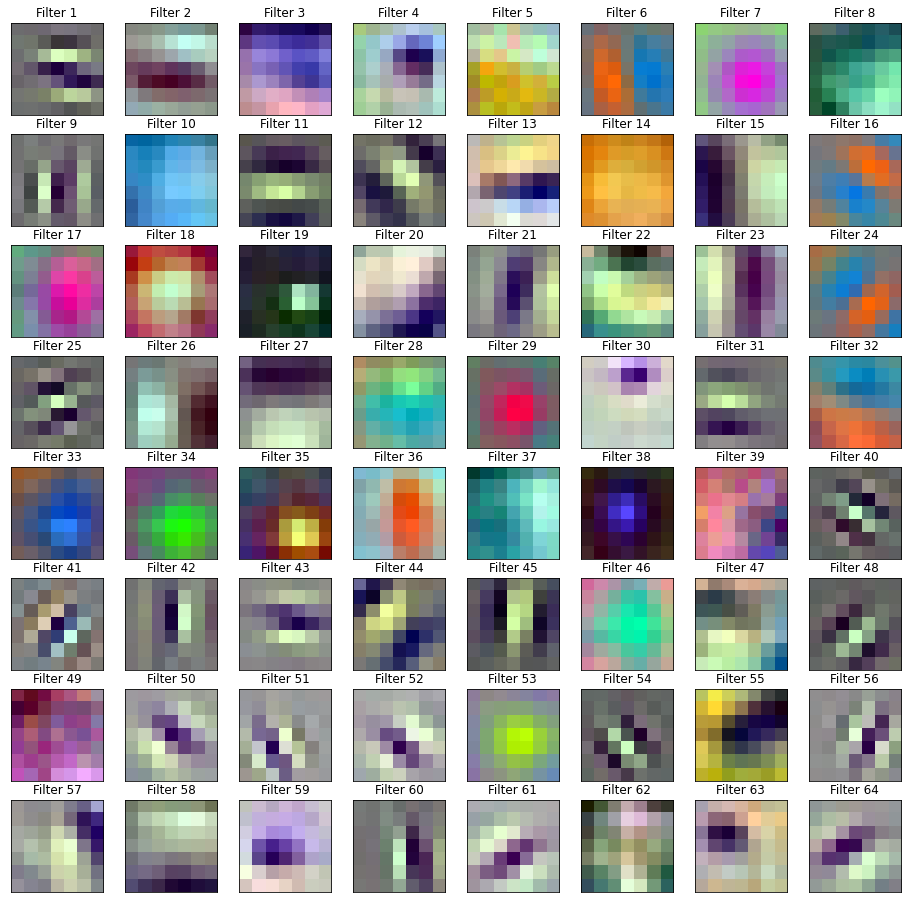

In [62]:
weights = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

# Exercise 3

Using the dataset that you loaded in Exercise 1, perform the following tasks:

- Set the random seed to 23, then create a CNN with 18 layers, no dropout, no batch normalization, no residuals, and no pretraining, using `u7.create_cnn()`

- Plot and keep a copy of the weights of the first layer (stored in variable `weights_before_training`).

- Train the model for 4 iterations, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using `u7.run_gradient_descent()`

- Plot and keep a copy of the weights of the first layer again (stored in variable `weights_after_training`).

- Compare the filters plotted before and after training. Do you see any difference?

- Print the absolute difference of the weights before and after training *(this is already done for you)*

**3.1. Set the random seed and create the specified CNN.**

In [63]:
u7.set_seed(23)

model = u7.create_cnn(
    num_classes=dataset.c, num_layers=18,
    batchnorm=False, dropout=0,
    residuals=False, pretrained=False)

**3.2. Plot the weights of the first layer and store them in a variable called `weights_before_training`.**

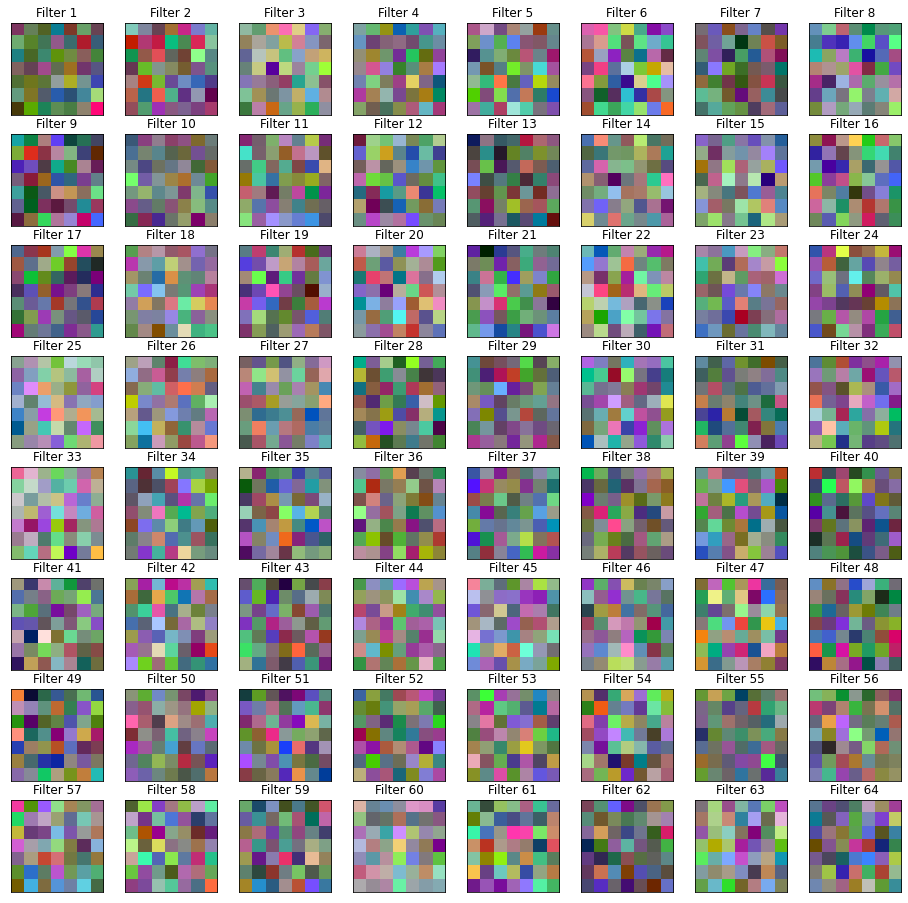

In [64]:
weights_before_training = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

**3.3. Train the model using the specified settings.**

In [65]:
losses = [] 
loss = torch.nn.functional.cross_entropy
u7.set_seed(23)

u7.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=4,
    learning_rate=0.005,
    momentum=0.9,
    lr_schedule=None,
    plot_curves=False)

  0%|          | 0/1002 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 1.101138 and validation loss: 1.097895
Epoch  2 finished with training loss: 1.096230 and validation loss: 1.096986
Epoch  3 finished with training loss: 1.095519 and validation loss: 1.096863
Epoch  4 finished with training loss: 1.094933 and validation loss: 1.094958


,training loss,validation loss
1,1.101138,1.097895
2,1.096230,1.096986
3,1.095519,1.096863
4,1.094933,1.094958


**3.4. Plot the weights of the first layer again and store them in a variable called `weights_after_training`.**

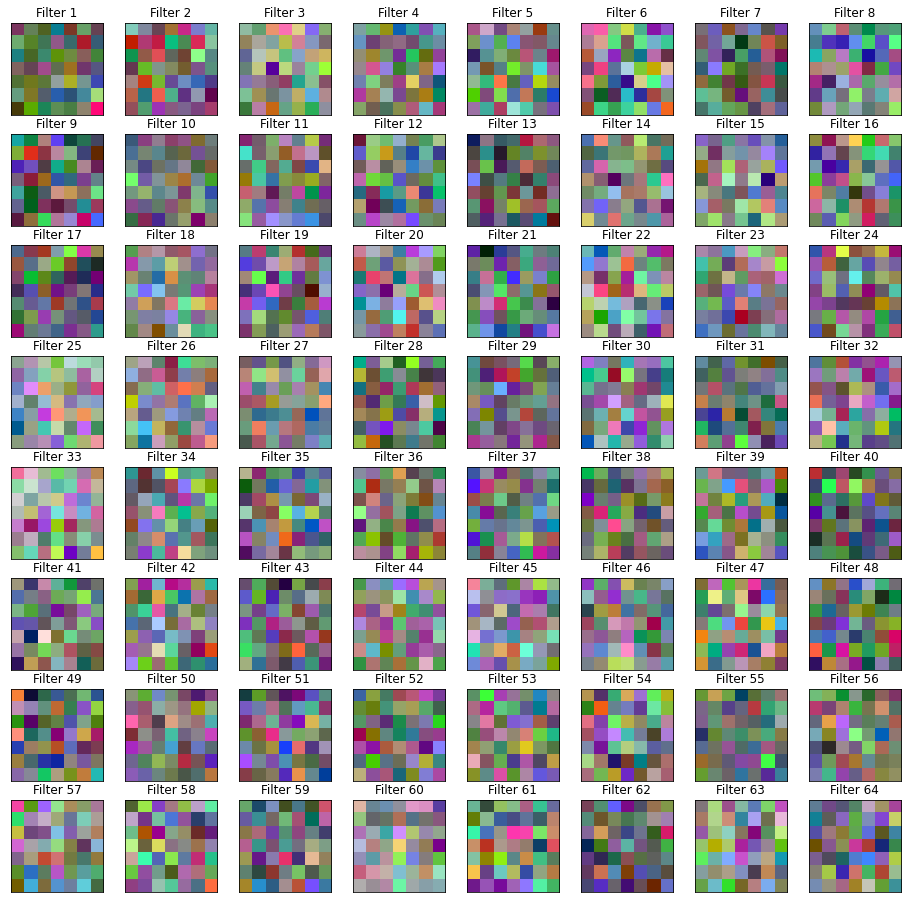

In [66]:
weights_after_training = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

**3.5. Do you see any difference? Did the filters change visibly during training?**

No, There's no "apparent" differences between them, The filters "almost" Didnt change, except for a slight brightness.

**Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.**

In [67]:
(weights_before_training - weights_after_training).abs().sum().item()

8.424906730651855

# Exercise 4

Similar to before, perform the following tasks:

- Set the random seed to 23, then create a CNN with 18 layers, no dropout, **with** batch normalization, **with** residuals, and no pretraining, using `u7.create_cnn()`

- Plot and keep a copy of the weights of the first layer (stored in variable `weights_before_training`).

- Train the model for 4 iterations, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using `u7.run_gradient_descent()`

- Plot and keep a copy of the weights of the first layer again (stored in variable `weights_after_training`).

- Compare the filters plotted before and after training. Do you see any difference?

- Print the absolute difference of the weights before and after training *(this is already done for you)*

**4.1. Set the random seed and create the specified CNN (with batchnorm and residuals).**

In [69]:
u7.set_seed(23)

model = u7.create_cnn(
    num_classes=dataset.c, num_layers=18,
    batchnorm=True, dropout=0,
    residuals=True, pretrained=False)

**4.2. Plot the weights of the first layer and store them in a variable called `weights_before_training`.**

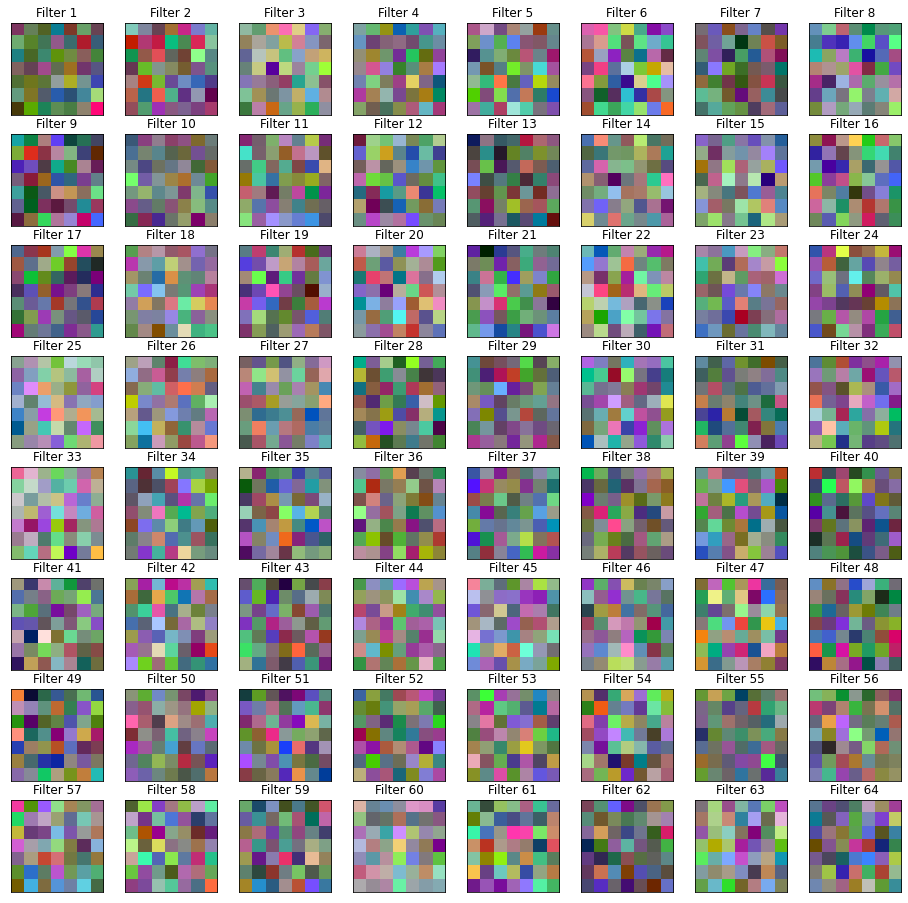

In [70]:
weights_after_training = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

**4.3. Train the model using the same specified settings.**

In [71]:
losses = [] 
loss = torch.nn.functional.cross_entropy
u7.set_seed(23)


u7.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=4,
    learning_rate=0.005,
    momentum=0.9,
    lr_schedule=None,
    plot_curves=False)

  0%|          | 0/1002 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 1.153329 and validation loss: 1.442529
Epoch  2 finished with training loss: 1.096185 and validation loss: 1.365360
Epoch  3 finished with training loss: 1.016126 and validation loss: 1.865744
Epoch  4 finished with training loss: 0.975983 and validation loss: 1.676192


,training loss,validation loss
1,1.153329,1.442529
2,1.096185,1.365360
3,1.016126,1.865744
4,0.975983,1.676192


**4.4. Plot the weights of the first layer again and store them in a variable called `weights_after_training`.**

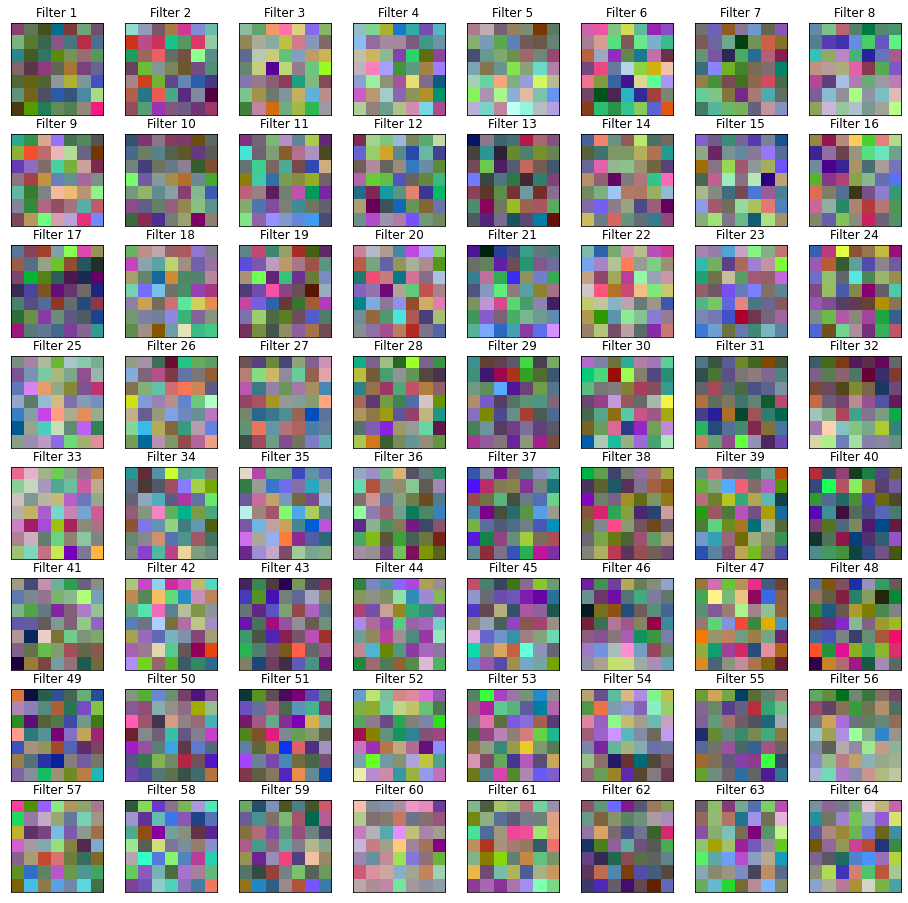

In [72]:
weights_after_training = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

**4.5. Do you see any difference now? Did the filters change visibly during training?**

It's almost the same situation as exercise 3,
No Apparent Visual Difference.

**Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.**

In [74]:
(weights_before_training - weights_after_training).abs().sum().item()

83.24559020996094